<a href="https://colab.research.google.com/github/ebartolo783/Se-ales-y-sistemas/blob/main/14_11_2024_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

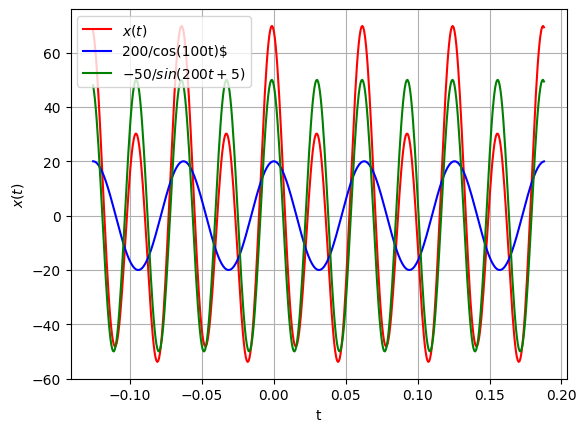

F1=15.915494309189533Hz  F2 =31.830988618379067 Hz  Fs1591.5494309189532 Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt

A1 = 20
A2 = 50
w1 = 100
w2 = 200
T1 = 2*np.pi/ w1
T2 = 2*np.pi /w2
F1 = w1 / (2*np.pi)
F2 = w2 / (2*np.pi)
# definir frecuencia de muestreo segun nyquist
Fs = 50 * max(F1,F2)
# periodo señal cuadiperiodica T = mcm (T1,T2)
T = np.pi / 50
# definir vector de tiempo
ti = -2 *T
tf = 3* T
phi2=5
tv = np.arange(ti,tf,1/Fs)
# construir la señal
x = A1*np.cos(w1*tv)- A2*np.sin(w2*tv+phi2)
xc = A1 *np.cos(w1*tv)
xs = -A2*np.sin(w2*tv+phi2)
plt.plot(tv,x,'r', label='$x(t)$')
plt.plot(tv,xc,'b', label = '200/cos(100t)$')
plt.plot(tv,xs,'g', label='$-50/sin(200t+5)$')
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.show()

print(f'F1={F1}Hz  F2 ={F2} Hz  Fs{Fs} Hz')


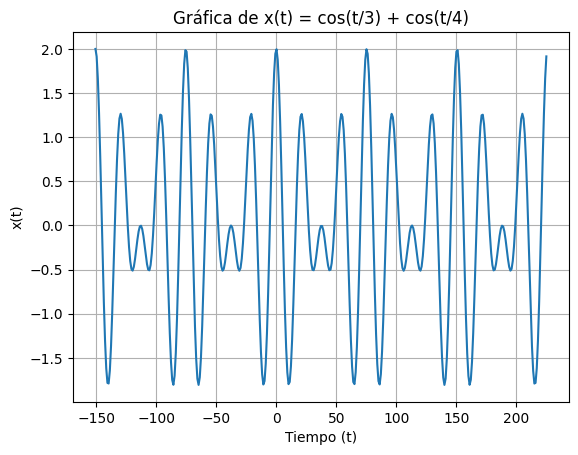

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define el periodo
T = 24 * np.pi

# Define el rango de tiempo para dos periodos
ti = -2*T
tf = 3*T
tiempo = np.arange(ti, tf, )

# Define la señal
x_t = np.cos(tiempo / 3) + np.cos(tiempo / 4)

# Crea la gráfica
plt.plot(tiempo, x_t)
plt.title('Gráfica de x(t) = cos(t/3) + cos(t/4)')
plt.xlabel('Tiempo (t)')
plt.ylabel('x(t)')
plt.grid(True)
plt.show()

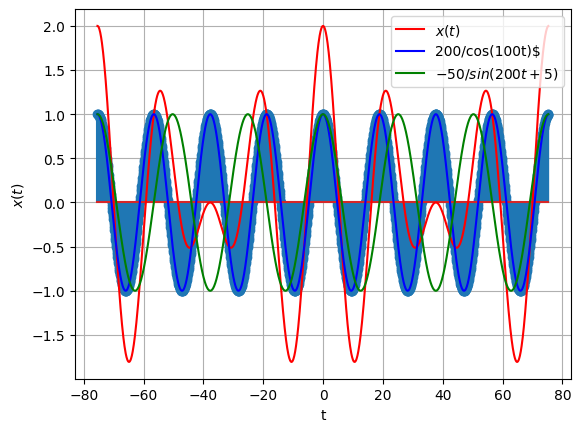

F1=0.05305164769729844Hz  F2 =0.039788735772973836 Hz  Fs10.610329539459688 Hz


In [3]:
import numpy as np
import matplotlib.pyplot as plt

A1 = 1
A2 = 1
w1 = 1/3
w2 = 1/4
T1 = 2*np.pi/ w1
T2 = 2*np.pi /w2
F1 = w1 / (2*np.pi)
F2 = w2 / (2*np.pi)
# definir frecuencia de muestreo segun nyquist
Fs = 200 * max(F1,F2)
# periodo señal cuadiperiodica T = mcm (T1,T2)
T = 24*np.pi
# definir vector de tiempo
ti = -1*T
tf = 1*T
phi2=0
tv = np.arange(ti,tf,1/Fs)
# construir la señal
x = A1*np.cos(w1*tv)+ A2*np.cos(w2*tv)
xc = A1 *np.cos(w1*tv)
xs = A2*np.cos(w2*tv+phi2)
plt.stem(tv,xc)
plt.plot(tv,x,'r', label='$x(t)$')
plt.plot(tv,xc,'b', label = '200/cos(100t)$')
plt.plot(tv,xs,'g', label='$-50/sin(200t+5)$')
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.show()

print(f'F1={F1}Hz  F2 ={F2} Hz  Fs{Fs} Hz')

In [4]:
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

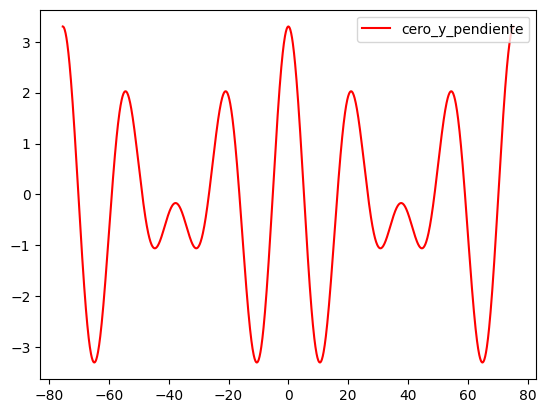

In [5]:
ymin=-3.3
ymax = 3.3
xcp = my_ceropen(x,ymin=ymin,ymax=ymax)
plt.plot(tv,xcp,c='r',label='cero_y_pendiente')
plt.legend()
plt.show()

In [ ]:
nbits=4
num_est= 2**nbits
vq =np.linspace(ymin,ymax,num_est)
vq

In [6]:
from scipy.spatial.distance import cdist
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

#graficar señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

NameError: name 'vq' is not defined